In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


In [2]:
#Reading the dataset
df = pd.read_csv("wfp_food_prices_uga.csv")
df.head(10)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Busia,Samia-bugwe,Busia,0.467,34.09,cereals and tubers,Maize,KG,actual,Wholesale,UGX,298.4,0.1641
2,2006-01-15,Kampala,Central Kampala,Owino,0.322805,32.574841,cereals and tubers,Maize,KG,actual,Wholesale,UGX,345.42,0.19
3,2006-01-15,Kampala,Central Kampala,Owino,0.322805,32.574841,cereals and tubers,Rice,KG,actual,Wholesale,UGX,1013.4,0.5573
4,2006-02-15,Busia,Samia-bugwe,Busia,0.467,34.09,cereals and tubers,Maize,KG,actual,Wholesale,UGX,296.59,0.1639
5,2006-03-15,Busia,Samia-bugwe,Busia,0.467,34.09,cereals and tubers,Maize,KG,actual,Wholesale,UGX,296.68,0.1632
6,2006-03-15,Kampala,Central Kampala,Owino,0.322805,32.574841,cereals and tubers,Maize,KG,actual,Wholesale,UGX,394.36,0.2169
7,2006-03-15,Kampala,Central Kampala,Owino,0.322805,32.574841,cereals and tubers,Rice,KG,actual,Wholesale,UGX,1133.91,0.6237
8,2006-04-15,Busia,Samia-bugwe,Busia,0.467,34.09,cereals and tubers,Maize,KG,actual,Wholesale,UGX,291.77,0.1595
9,2006-05-15,Kampala,Central Kampala,Owino,0.322805,32.574841,cereals and tubers,Maize,KG,actual,Wholesale,UGX,429.6,0.24


In [3]:
df.tail(10)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
17156,2024-03-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,non-food,Mug (plastic),Unit,actual,Retail,UGX,1000.0,0.2579
17157,2024-03-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,non-food,Nails,KG,actual,Retail,UGX,7875.0,2.0307
17158,2024-03-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,non-food,Pen,Unit,actual,Retail,UGX,700.0,0.1805
17159,2024-03-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,non-food,Pencil,Unit,actual,Retail,UGX,200.0,0.0516
17160,2024-03-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,non-food,Plate (plastic),Unit,actual,Retail,UGX,875.0,0.2256
17161,2024-03-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,non-food,Pole,Unit,actual,Retail,UGX,5750.0,1.4827
17162,2024-03-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,non-food,Sanitary pads,Packet,actual,Retail,UGX,2375.0,0.6124
17163,2024-03-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,non-food,Serving spoon,Unit,actual,Retail,UGX,2375.0,0.6124
17164,2024-03-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,non-food,Wooden mingle,Unit,actual,Retail,UGX,667.0,0.172
17165,2024-03-15,Yumbe,Aringa,Bidibidi (refugee settlement),3.36217471,31.35196642,vegetables and fruits,Leafy vegetables,KG,actual,Retail,UGX,3162.0,0.8154


In [4]:
#printing the shape
df.shape

(17166, 14)

In [5]:
#checking for the null values
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [6]:
#Description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17166 entries, 0 to 17165
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       17166 non-null  object
 1   admin1     17166 non-null  object
 2   admin2     17166 non-null  object
 3   market     17166 non-null  object
 4   latitude   17166 non-null  object
 5   longitude  17166 non-null  object
 6   category   17166 non-null  object
 7   commodity  17166 non-null  object
 8   unit       17166 non-null  object
 9   priceflag  17166 non-null  object
 10  pricetype  17166 non-null  object
 11  currency   17166 non-null  object
 12  price      17166 non-null  object
 13  usdprice   17166 non-null  object
dtypes: object(14)
memory usage: 1.8+ MB


In [7]:
#Segregating categorical values from numerical values
catcol = []
numcol = []

for col in df.columns:
    if df[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)

In [8]:
#Encoding
encoder = LabelEncoder()

for col in catcol:
    df[col] = encoder.fit_transform(df[col])
df.head(10)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,5,36,4,13,33,1,15,1,1,2,1,1872,516
2,1,14,11,36,8,25,1,15,1,1,2,1,2095,655
3,1,14,11,36,8,25,1,30,1,1,2,1,18,3264
4,2,5,36,4,13,33,1,15,1,1,2,1,1856,514
5,3,5,36,4,13,33,1,15,1,1,2,1,1857,508
6,3,14,11,36,8,25,1,15,1,1,2,1,2300,811
7,3,14,11,36,8,25,1,30,1,1,2,1,185,3702
8,4,5,36,4,13,33,1,15,1,1,2,1,1826,488
9,5,14,11,36,8,25,1,15,1,1,2,1,2392,968


In [9]:
#SCALING
scaler = MinMaxScaler()
for col in numcol:
    df[[col]] = scaler.fit_transform(df[[col]])
    

In [10]:
df.head(10)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,5,36,4,13,33,1,15,1,1,2,1,1872,516
2,1,14,11,36,8,25,1,15,1,1,2,1,2095,655
3,1,14,11,36,8,25,1,30,1,1,2,1,18,3264
4,2,5,36,4,13,33,1,15,1,1,2,1,1856,514
5,3,5,36,4,13,33,1,15,1,1,2,1,1857,508
6,3,14,11,36,8,25,1,15,1,1,2,1,2300,811
7,3,14,11,36,8,25,1,30,1,1,2,1,185,3702
8,4,5,36,4,13,33,1,15,1,1,2,1,1826,488
9,5,14,11,36,8,25,1,15,1,1,2,1,2392,968


DATA VISUALIZATION

[ 0  4 36 22  6  8 10 13 17 28 24 15 11 19 27 33 41 26 12  1  9 39 21 32
 35 40 18 23 20 37 38  3  2  7 16 29 42  5 25 30 43 31 14 34]


<Axes: xlabel='market', ylabel='price'>

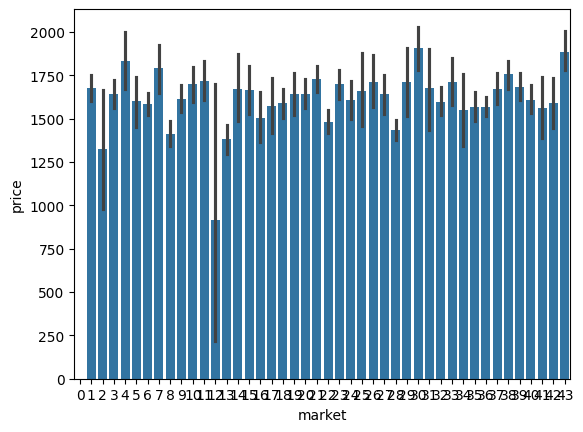

In [11]:

print(df['market'].unique())
sns.barplot(df, x="market", y="price")

[ 0 15 30  3  5 27 17 16 35 19 23  4 20  9 18 32 14  1  2  6  7 12 13 21
 22 25 26 28 29 33 36 38  8 11 31 37 34 10 24]


<Axes: xlabel='commodity', ylabel='price'>

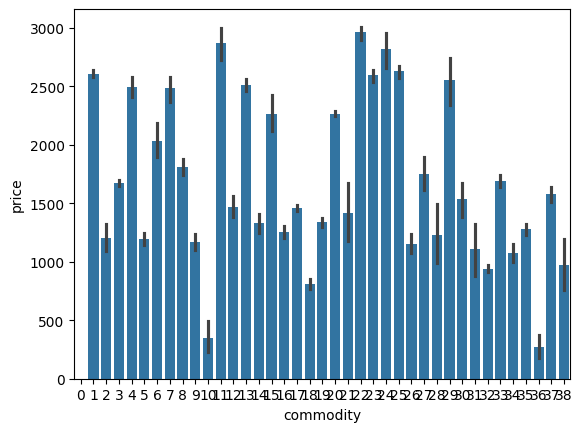

In [12]:
print(df['commodity'].unique())
sns.barplot(df, x="commodity", y="price")

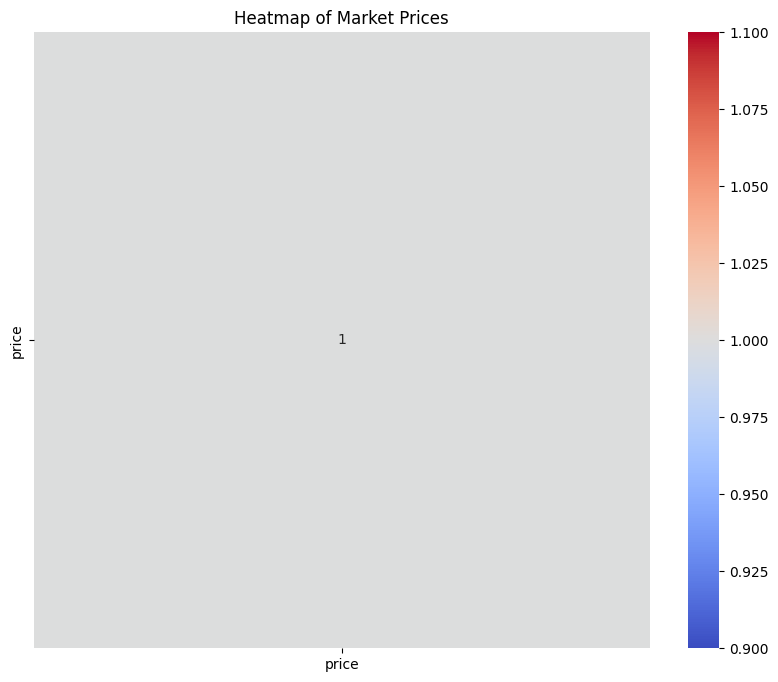

In [13]:
#Constructing a heatmap

# Calculate the pivot table for the heatmap
pivot_df = df.pivot_table(index='market', values='price', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Market Prices')
plt.show()

In [14]:
#SPLITTING THE DATA
x=df.drop("price",axis=1)
y=df["price"]

In [15]:

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
#Our dataset consists of a continous target so we shall use algorithms that can handle targets with continous data
le = LinearRegression()
knr = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rfr= RandomForestRegressor(n_estimators = 100, random_state = 0)
XGBRegressor = XGBRegressor()

In [17]:
#Training using LinearRegression
le.fit(x_train,y_train)


LinearRegression()

In [18]:
#Testing using LinearRegression
y_pred=le.predict(x_train)
score = mean_squared_error(y_train, y_pred)
print(score)


922601.8615880148


In [19]:
#Determining the r2_score of the linear regression 
y_pred=le.predict(x_train)
score = r2_score(y_train, y_pred)
print(score)


0.09741275820938822


In [20]:
#Training using  DecisionTreeRegressor
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [21]:
#Testing using DecisionTreeRegressor
y_pred=dt.predict(x_train)
score = mean_squared_error(y_train, y_pred)
print(score)

0.0


In [22]:
#Determining the r2_score of DecisionTreeRegressor
y_pred=dt.predict(x_train)
score = r2_score(y_train, y_pred)
print(score)


1.0


r2_score=1.0 and mean_squared_error=0.0 for DecisionTreeRegressor,,,, this indicates that the model perfectly predicts the observed outcomes.

In [ ]:
#Training using  RandomForestRegressor
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [ ]:
#Testing using RandomForestRegressor    
y_pred=rfr.predict(x_train)
score = mean_squared_error(y_train, y_pred)
print(score)

7639.354353786775


In [ ]:
#Determining the r2_score of  RandomForestRegressor
y_pred=rfr.predict(x_train)
score = r2_score(y_train, y_pred)
print(score)


0.9925263712741949


In [ ]:
#Training using XGBRegressor 
XGBRegressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Testing using XGBRegressor
y_pred=XGBRegressor.predict(x_train)
score = mean_squared_error(y_train, y_pred)
print(score)

6240.582471822239


In [ ]:
#Determining the r2_score of XGBRegressor
y_pred=XGBRegressor.predict(x_train)
score = r2_score(y_train, y_pred)
print(score)


0.9938947986613492


In [ ]:
#Training using KNeighborsRegressor
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred=knr.predict(x_train)
score = mean_squared_error(y_train, y_pred)
print(score)

91761.03362365278


In [ ]:
#Determining the r2_score of NeighborsRegressor
y_pred=knr.predict(x_train)
score = r2_score(y_train, y_pred)
print(score)


0.9102295999059967
